affine transformations, SIFT (and SURF and ORB), and RANSAC

In [1]:
# the usual
import numpy as np
import matplotlib.pyplot as plt

!pip install opencv-python
import cv2

Part 1: affine transformations

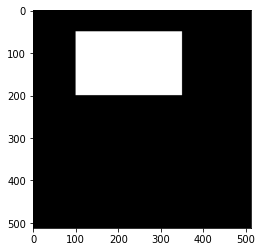

In [2]:
# draw a rectangle
img = np.zeros(shape=[512, 512], dtype=np.uint8)
img[50:200,100:350]=255
plt.imshow(img, cmap='gray')

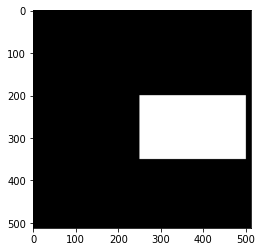

In [3]:
# translation
rows, cols = img.shape 
#matrix is I -> just move, perserve orientation
M = np.array([[1.0, 0, 150], [0, 1, 150]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]]


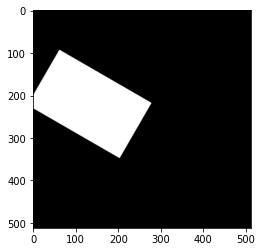

In [4]:
# rotation
theta = np.pi / 6
M = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0]])
print(M)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

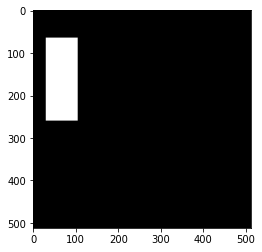

In [5]:
# shear
M = np.array([[.3, 0, 0], [0, 1.3, 0]])
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

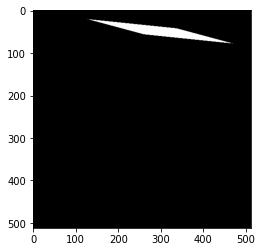

In [6]:
# random affine transform
M = np.random.rand(2,3)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

M is [[0.9 0.1 9. ]
 [0.7 0.6 7. ]]


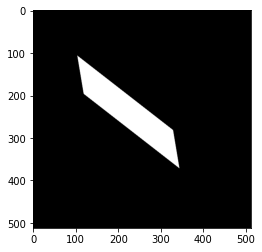

In [7]:
# calculate an affine transform based on point matches
pts1 = np.float32([[10, 10], 
                   [20, 30],  
                   [30, 40]]) 
  
pts2 = np.float32([[19, 20], 
                   [30, 39],  
                   [40, 52]]) 
  
M = cv2.getAffineTransform(pts1, pts2) # least squares (if more than 3 point matches given)
print('M is', M)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(dst, cmap='gray')

Part 2: SIFT (and SURF and ORB)

In [8]:
!pip install opencv-contrib-python==3.4.0.12 # otherwise you'd get an error message saying this when you try to use SIFT
                                   # This algorithm is patented and is excluded in this configuration; 
                                   # Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in 
                                   # function 'cv::xfeatures2d::SIFT::create'

In [9]:
# first mount your google drive
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


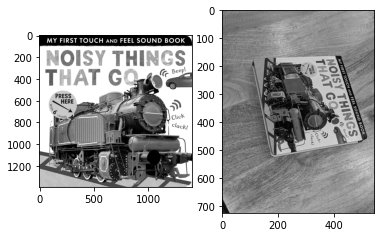

In [10]:
# load two images
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/Lec_Tut/SIFT/Book_cover.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/drive/My Drive/Colab Notebooks/Lec_Tut/SIFT/Book_pic.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')

In [11]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create() # read about SURF here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html
orb = cv2.ORB_create(nfeatures=1000) # read about ORB here: https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html 

In [12]:
#coordinates of keypoints and SIFT descriptors vectors
kp1_SIFT, desc1_SIFT = sift.detectAndCompute(img1, None)
kp2_SIFT, desc2_SIFT = sift.detectAndCompute(img2, None)

kp1_SURF, desc1_SURF = surf.detectAndCompute(img1, None)
kp2_SURF, desc2_SURF = surf.detectAndCompute(img2, None)

kp1_ORB, desc1_ORB = orb.detectAndCompute(img1, None)
kp2_ORB, desc2_ORB = orb.detectAndCompute(img2, None)

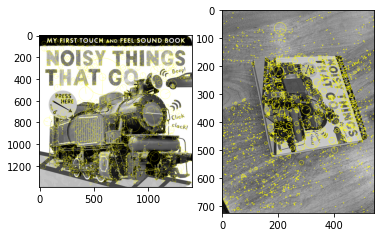

In [13]:
img1_SIFT = cv2.drawKeypoints(img1, kp1_SIFT, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(255,255,0))
img2_SIFT = cv2.drawKeypoints(img2, kp2_SIFT, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(255,255,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_SIFT)
plt.subplot(1, 2, 2)
plt.imshow(img2_SIFT)

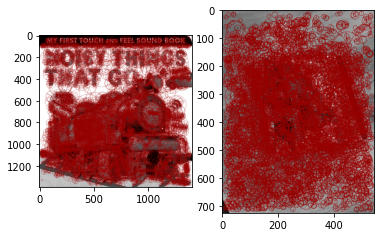

In [14]:
img1_SURF = cv2.drawKeypoints(img1, kp1_SURF, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(150,0,0))
img2_SURF = cv2.drawKeypoints(img2, kp2_SURF, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(150,0,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_SURF)
plt.subplot(1, 2, 2)
plt.imshow(img2_SURF)

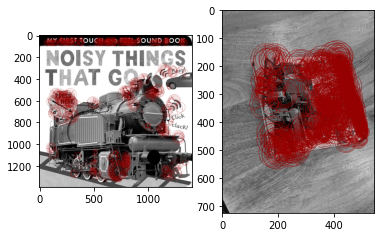

In [15]:
img1_ORB = cv2.drawKeypoints(img1, kp1_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(150,0,0))
img2_ORB = cv2.drawKeypoints(img2, kp2_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(150,0,0))

plt.subplot(1, 2, 1)
plt.imshow(img1_ORB)
plt.subplot(1, 2, 2)
plt.imshow(img2_ORB)

In [16]:
# which keypoints/descriptor to use?

kp1 = kp1_SIFT
kp2 = kp2_SIFT
desc1 = desc1_SIFT
desc2 = desc2_SIFT

# kp1 = kp1_SURF
# kp2 = kp2_SURF
# desc1 = desc1_SURF
# desc2 = desc2_SURF

# kp1 = kp1_ORB
# kp2 = kp2_ORB
# desc1 = desc1_ORB
# desc2 = desc2_ORB

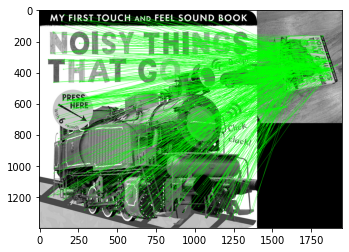

(<matplotlib.image.AxesImage at 0x7fcfcd456a20>, None)

In [17]:
#SIFT descriptors matching
# (brute force) matching of descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2) # k=2 means find the top two matchs for each query descriptor

# Apply ratio test (as per David Lowe's SIFT paper: compare the best match with the 2nd best match_
good_matches = []
good_matches_without_list = []
for m,n in matches:
    if m.distance < 0.75*n.distance: # only accept matchs that are considerably better than the 2nd best match
        good_matches.append([m])
        good_matches_without_list.append(m) # this is to simplify finding a homography later

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good_matches,
                          None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, 
                          matchColor=(0,255,0))
plt.imshow(img3),plt.show()

# you can also an approximate (but fast) nearest neighbour algorithm called FLANN. See here:
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

Part 3: RANSAC

In [18]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches_without_list ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches_without_list ]).reshape(-1,1,2)

M is,  [[ 2.95911450e-02 -2.32316779e-01  4.23150658e+02]
 [ 1.77125388e-01 -7.73042631e-03  1.60741585e+02]
 [-7.57760467e-05 -8.86120337e-05  1.00000000e+00]]


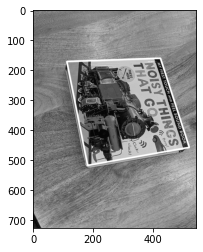

In [21]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
#M is 3x3
print('M is, ',M)
h,w = img1.shape
#points in the cover image
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
#map the boundary of the book in the second image
detected_book = cv2.perspectiveTransform(pts,M)

img3 = cv2.polylines(img2,[np.int32(detected_book)],True,255,3, cv2.LINE_AA)
plt.imshow(img3, 'gray')

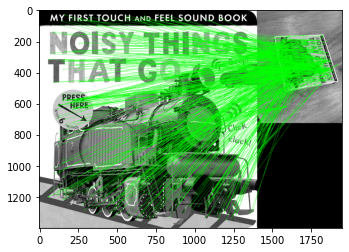

(<matplotlib.image.AxesImage at 0x7fcfcb6c5358>, None)

In [20]:
img4 = cv2.drawMatchesKnn(img1,kp1,img3,kp2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=(0,255,0))
plt.imshow(img4),plt.show()